**Data Gathering**

In [20]:
import urllib
import os
# create the directory to store the dataset
data_path = os.path.join('datasets', 'task00d', '')
if not os.path.isdir(data_path):
       os.makedirs(data_path)
# Download the dataset        
download_root = 'https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/lifesat/'
for file in ("oecd_bli_2015.csv", "gdp_per_capita.csv"):
    urllib.request.urlretrieve(download_root+file, data_path+file) # to get from this on server, and put in that locally.  

SyntaxError: invalid syntax (<ipython-input-20-0fd269945ad6>, line 11)

**Data Loading**

In [164]:
import pandas as pd
lifesat = pd.read_csv(data_path+'oecd_bli_2015.csv')
gdp = pd.read_csv(data_path+'gdp_per_capita.csv', delimiter='\t', encoding='latin1',thousands=',', na_values='n/a')

In [165]:
lifesat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3292 entries, 0 to 3291
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LOCATION               3292 non-null   object 
 1   Country                3292 non-null   object 
 2   INDICATOR              3292 non-null   object 
 3   Indicator              3292 non-null   object 
 4   MEASURE                3292 non-null   object 
 5   Measure                3292 non-null   object 
 6   INEQUALITY             3292 non-null   object 
 7   Inequality             3292 non-null   object 
 8   Unit Code              3292 non-null   object 
 9   Unit                   3292 non-null   object 
 10  PowerCode Code         3292 non-null   int64  
 11  PowerCode              3292 non-null   object 
 12  Reference Period Code  0 non-null      float64
 13  Reference Period       0 non-null      float64
 14  Value                  3292 non-null   float64
 15  Flag

In [166]:
gdp.head(2)

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0


In [167]:
gdp.head(1)

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0


In [168]:
lifesat.head(1)

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.1,E,Estimated value


**Data Preparation**

In [169]:
lifesat = lifesat[lifesat['INEQUALITY']=='TOT'] # to remove duplicates on the specified index/column position.

In [170]:
lifesat = lifesat.pivot(index='Country', columns='Indicator', values='Value')

In [171]:
gdp.rename(columns={'2015':'GDP Per Capita'}, inplace=True)

In [172]:
lifesat['Life satisfaction'].value_counts()

7.3    4
7.0    3
7.4    3
6.5    3
7.5    3
6.9    3
5.6    2
5.8    2
6.7    2
6.0    2
7.2    2
4.9    1
6.8    1
6.6    1
5.7    1
6.1    1
5.9    1
4.8    1
5.1    1
Name: Life satisfaction, dtype: int64

In [173]:
gdp.set_index('Country', inplace=True)

In [225]:
final_df = pd.merge(left=lifesat, right=gdp, left_index=True, right_index=True)
final_df.head(2)
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, Australia to United States
Data columns (total 30 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Air pollution                              36 non-null     float64
 1   Assault rate                               36 non-null     float64
 2   Consultation on rule-making                36 non-null     float64
 3   Dwellings without basic facilities         36 non-null     float64
 4   Educational attainment                     36 non-null     float64
 5   Employees working very long hours          36 non-null     float64
 6   Employment rate                            36 non-null     float64
 7   Homicide rate                              36 non-null     float64
 8   Household net adjusted disposable income   36 non-null     float64
 9   Household net financial wealth             36 non-null     float64
 10  Housing expend

In [226]:
final_df.shape

(36, 30)

In [176]:
final_df = final_df[['GDP Per Capita', 'Life satisfaction']] # Remove every attribute that are not of interest.

In [227]:
final_df.sort_values(by='GDP Per Capita', inplace=True) # ascending order which is the default.

In [228]:
final_df.head()  # Great Job!

,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP Per Capita,Estimates Start After
Country,,,,,,,,,,,,,,,,,,,,,
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,...,14.97,79.0,72.0,16.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",8669.998,2014.0
Mexico,30.0,12.8,9.0,4.2,37.0,28.83,61.0,23.4,13085.0,9056.0,...,13.89,63.0,67.0,14.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9009.280,2015.0
Russia,15.0,3.8,2.5,15.1,94.0,0.16,69.0,12.8,19292.0,3412.0,...,14.97,65.0,56.0,16.0,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9054.914,2015.0
Turkey,35.0,5.0,5.5,12.7,34.0,40.86,50.0,1.2,14095.0,3251.0,...,13.42,88.0,62.0,16.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9437.372,2013.0
Hungary,15.0,3.6,7.9,4.8,82.0,3.19,58.0,1.3,15442.0,13277.0,...,15.04,62.0,77.0,17.6,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",12239.894,2015.0


In [229]:
final_df.tail()

,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP Per Capita,Estimates Start After
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,15.0,3.9,7.0,0.9,78.0,2.03,73.0,0.3,26491.0,44488.0,...,16.06,88.0,94.0,19.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",52114.165,2015.0
United States,18.0,1.5,8.3,0.1,89.0,11.30,67.0,5.2,41355.0,145769.0,...,14.27,68.0,85.0,17.2,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",55805.204,2015.0
Norway,16.0,3.3,8.1,0.3,82.0,2.82,75.0,0.6,33492.0,8797.0,...,15.56,78.0,94.0,17.9,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",74822.106,2015.0
Switzerland,20.0,4.2,8.4,0.0,86.0,6.72,80.0,0.5,33491.0,108823.0,...,14.98,49.0,96.0,17.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",80675.308,2015.0
Luxembourg,12.0,4.3,6.0,0.1,78.0,3.47,66.0,0.4,38951.0,61765.0,...,15.12,91.0,86.0,15.1,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",101994.093,2014.0


**ML Stage**

In [230]:
# initial visualization to investigate the relationship between the GDP & LSI.

In [231]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [232]:
final_df['GDP Per Capita'].max()

101994.09300000001

In [233]:
remove_samp = [0, 15, 26, 27, 28, 29, 33, 6, 8, 9] # randomely selected countries indeces to be removed before the training.
keep_samp = list(set(range(36))-set(remove_samp))

In [234]:
tmp_final_df = final_df.iloc[keep_samp]

In [235]:
# prepare the data for the ML algorithm.
X = np.c_[tmp_final_df['GDP Per Capita']]  # input data
y = np.c_[tmp_final_df['Life satisfaction']] # the given labels bec. it's a supervised ML algorithm.

In [236]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, Brazil to Luxembourg
Data columns (total 30 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Air pollution                              36 non-null     float64
 1   Assault rate                               36 non-null     float64
 2   Consultation on rule-making                36 non-null     float64
 3   Dwellings without basic facilities         36 non-null     float64
 4   Educational attainment                     36 non-null     float64
 5   Employees working very long hours          36 non-null     float64
 6   Employment rate                            36 non-null     float64
 7   Homicide rate                              36 non-null     float64
 8   Household net adjusted disposable income   36 non-null     float64
 9   Household net financial wealth             36 non-null     float64
 10  Housing expenditure 

In [238]:
# select the linear regression model.
import sklearn.linear_model
model = sklearn.linear_model.LinearRegression()
model.fit(X, y)

LinearRegression()

In [239]:
model.predict([[22587.0]])

array([[6.18473679]])

In [217]:
missing = final_df.iloc[remove_samp]
missing

,GDP Per Capita,Life satisfaction
Country,,
Brazil,8669.998,7.0
Italy,29866.581,6.0
United Kingdom,43770.688,6.8
Sweden,49866.266,7.2
Iceland,50854.583,7.5
Australia,50961.865,7.3
Norway,74822.106,7.4
Chile,13340.905,6.7
Czech Republic,17256.918,6.5


In [198]:
tmp_final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26 entries, Mexico to Luxembourg
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GDP Per Capita     26 non-null     float64
 1   Life satisfaction  26 non-null     float64
dtypes: float64(2)
memory usage: 624.0+ bytes


In [199]:
X_tmp = np.c_[tmp_final_df['GDP Per Capita']]
y_tmp = np.c_[tmp_final_df['Life satisfaction']]              

In [212]:
model.fit(X_tmp, y_tmp)
model.predict([[55805.204]])

array([[7.0094179]])

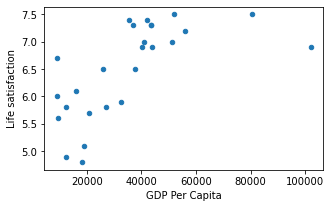

In [205]:
tmp_final_df.plot(kind='scatter', x='GDP Per Capita', y='Life satisfaction', figsize=(5, 3))

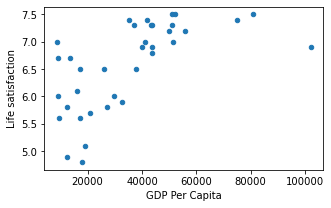

In [204]:
final_df.plot(kind='scatter', x='GDP Per Capita', y='Life satisfaction', figsize=(5, 3))

In [208]:
model.intercept_[0], model.coef_[0][0]

(5.623987867485846, 2.4826179848366637e-05)

In [218]:
import sklearn.neighbors
model2 = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)

In [220]:
X = np.c_[final_df["GDP Per Capita"]]
y = np.c_[final_df["Life satisfaction"]]

# Train the model
model2.fit(X, y)

# Make a prediction for Cyprus
X_new = np.array([[22587.0]])  # Cyprus' GDP per capita
print(model.predict(X_new)) # outputs [[ 5.76666667]]

[[6.28653637]]
